<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


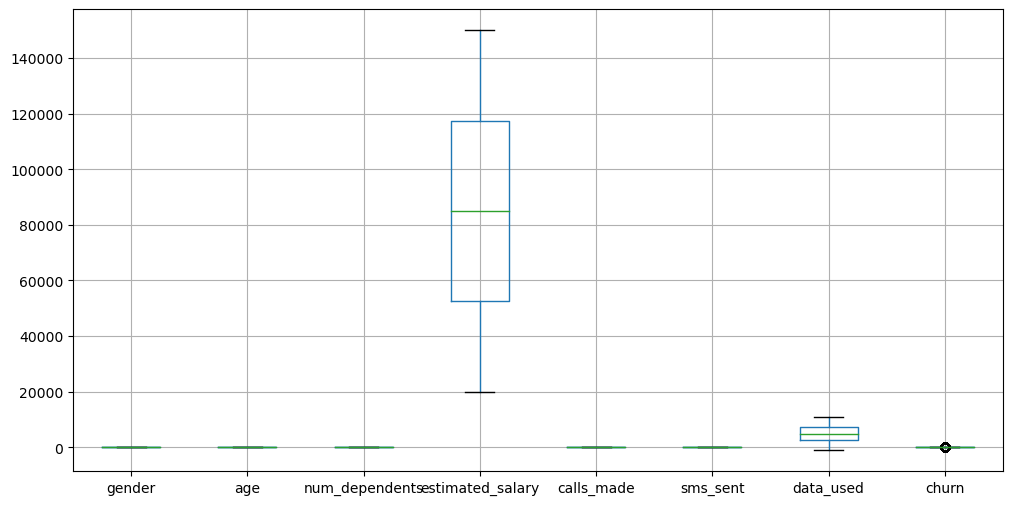

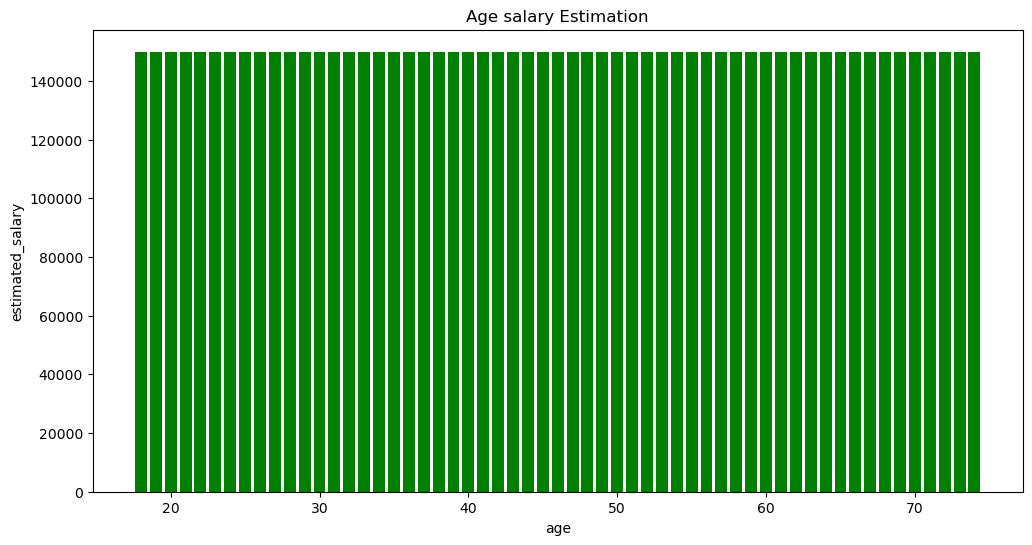

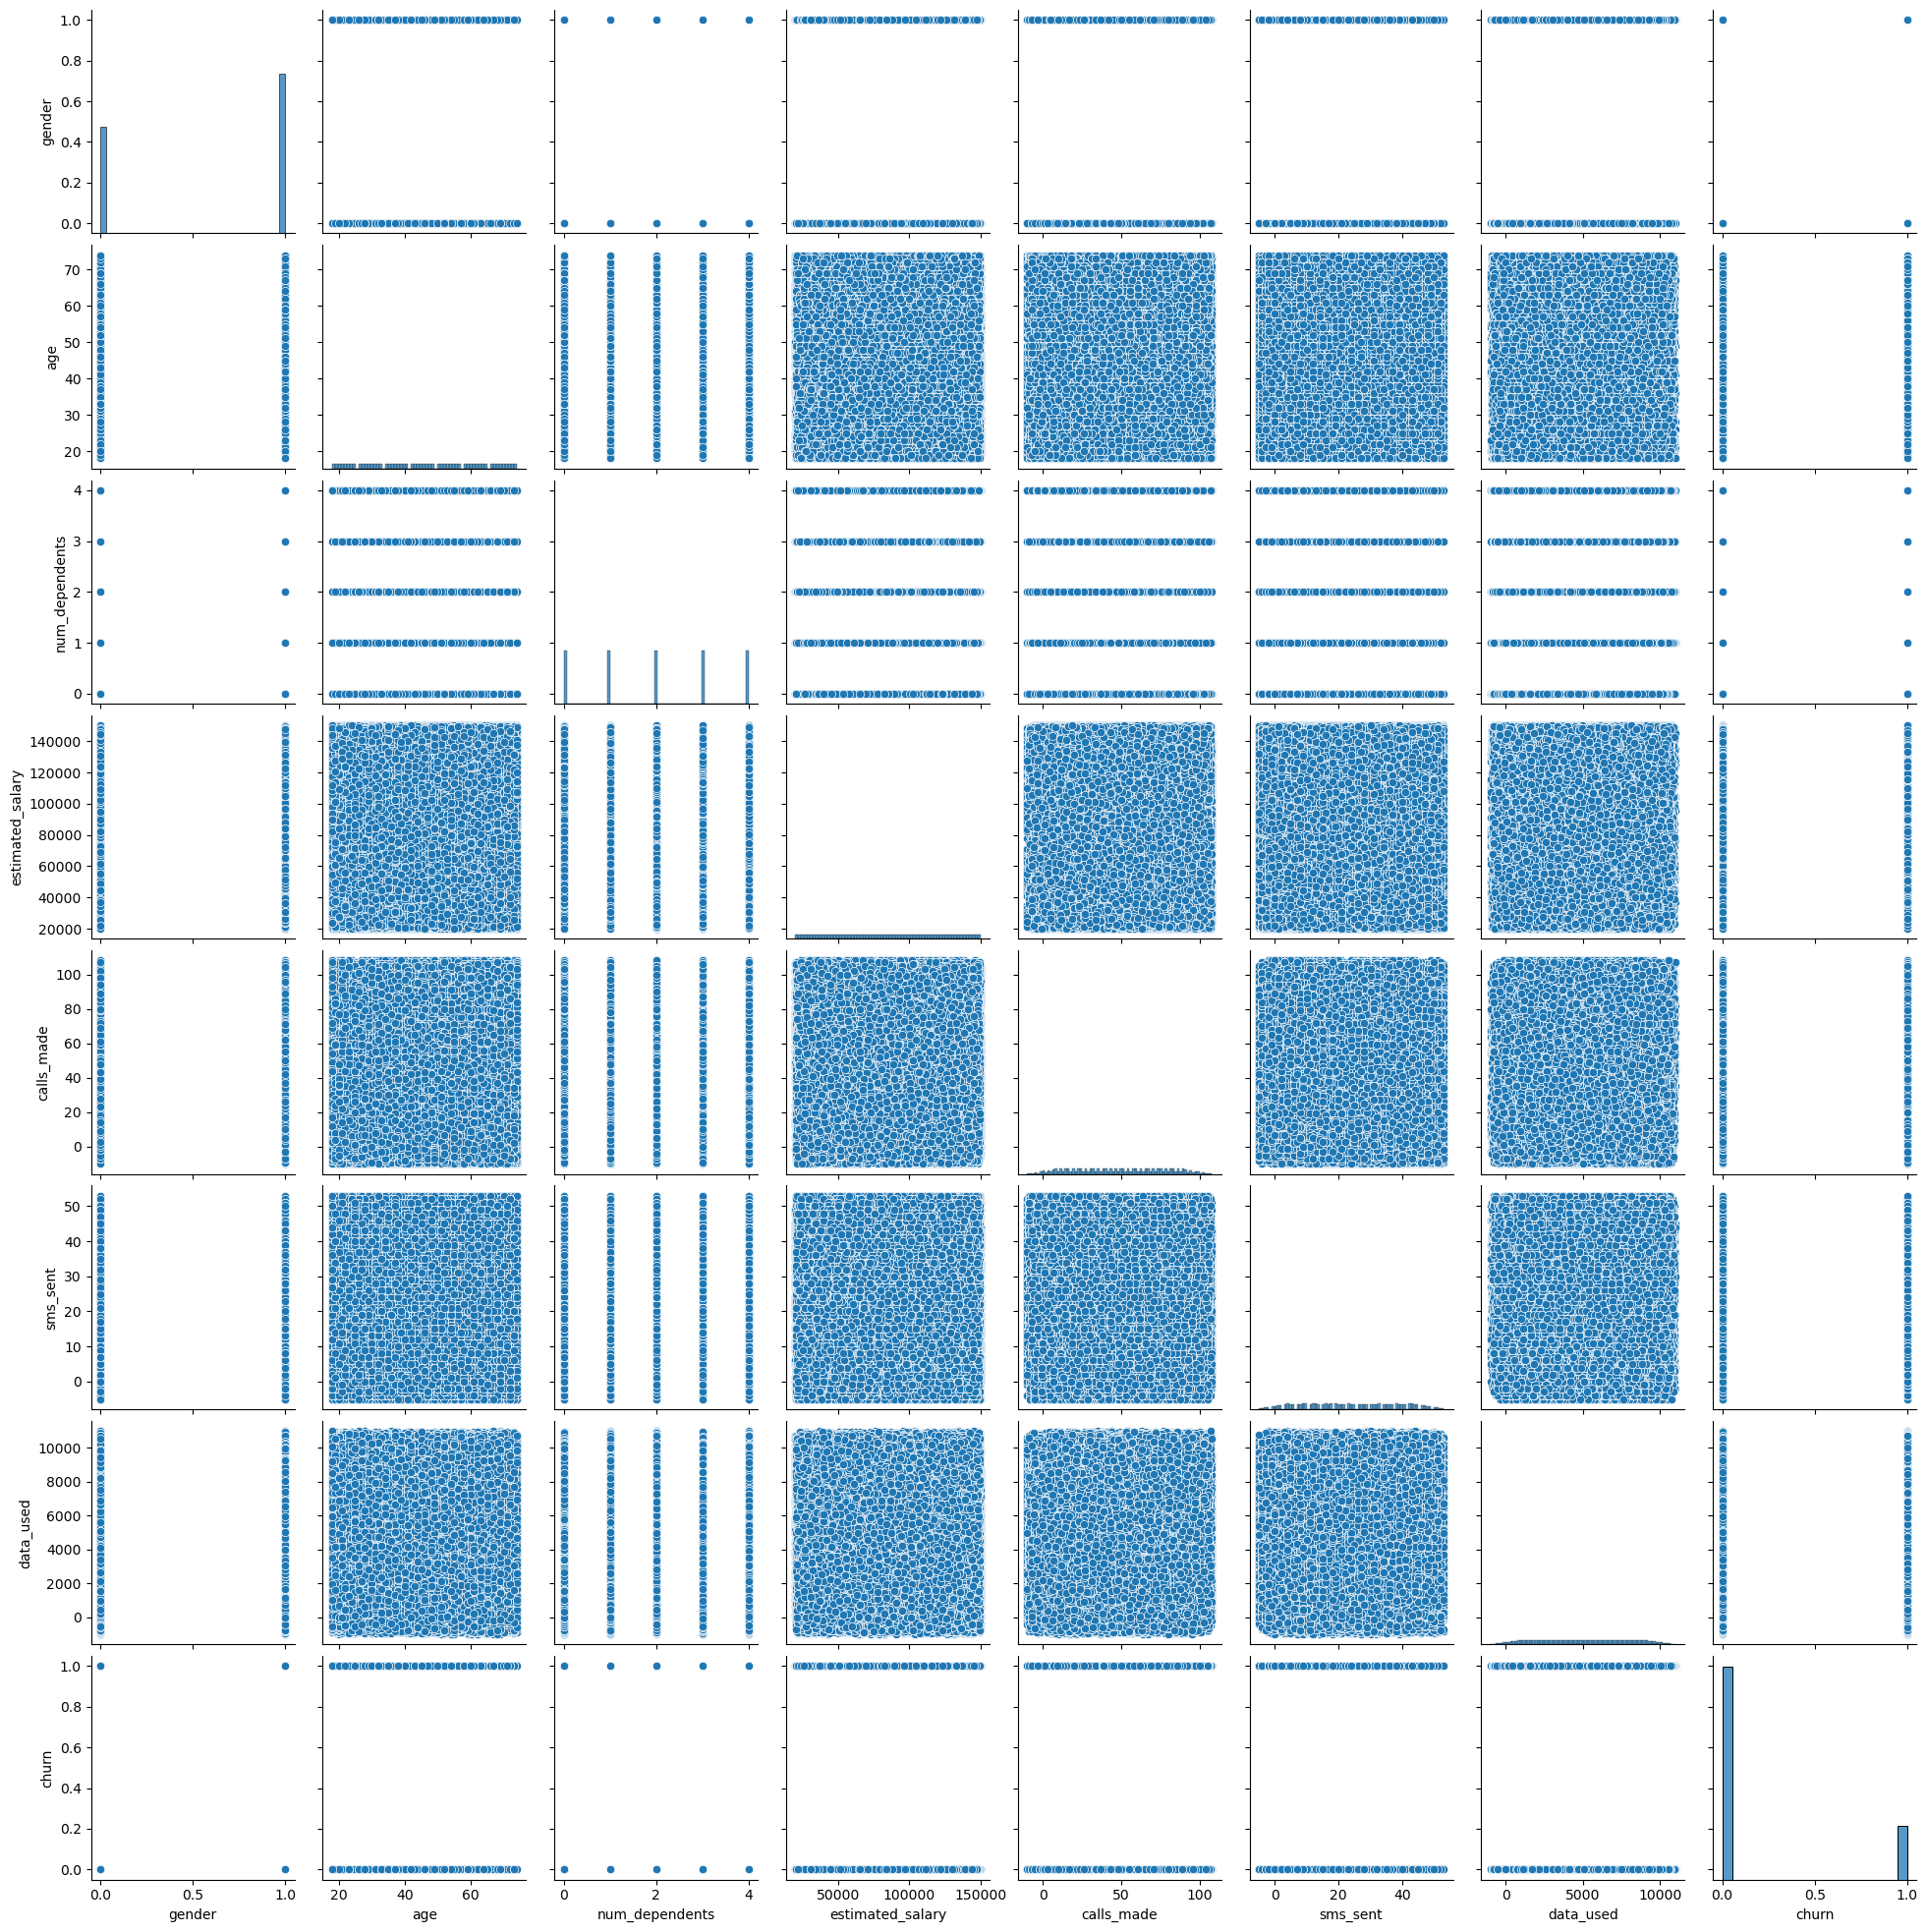

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv("telecom_churn.csv")
df.head()


df.info()


df.describe()

df.shape


df.isna().sum()

df.dropna(inplace=True)


df.duplicated().sum()

df.drop_duplicates(inplace=True)

df.columns


df.drop(['customer_id','state','city',"pincode",'telecom_partner','date_of_registration'], inplace=True, axis=1)
df.head()


le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

df.head()


average_salary = df.groupby('age')['estimated_salary'].mean()
average_salary.head()


plt.figure(figsize=(12,6))
df.boxplot()
plt.show()

plt.figure(figsize=(12,6))
plt.bar(df['age'],df['estimated_salary'],color='green')
plt.title('Age salary Estimation')
plt.xlabel('age')
plt.ylabel('estimated_salary')
plt.show()


sns.pairplot(df)
plt.show()


df.dtypes


X = df.drop(columns=['churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)